## Section 1: Exploratory Data Analysis with Python

In [9]:
import pandas as pd
import numpy as np

In [10]:

# Read only the column names without loading full data
df_original_columns = pd.read_csv("data/loan.csv", nrows=1) 
print(df_original_columns.columns.tolist())


['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_i

In [11]:
# Define selected columns
columns_to_keep = [
    "loan_amnt", "funded_amnt", "funded_amnt_inv", "installment",
    "int_rate", "sub_grade", "grade", "emp_length", "home_ownership",
    "annual_inc", "dti", "loan_status", "total_pymnt", "recoveries",
    "out_prncp", "total_rec_prncp", "total_rec_int", "delinq_2yrs",
    "revol_bal", "revol_util", "issue_d", "earliest_cr_line", "last_pymnt_d", "purpose"
]

# Load only the selected columns
df_trunc = pd.read_csv("data/loan.csv", usecols=columns_to_keep, low_memory=False)


In [12]:
# Randomly sample 50,000 rows
df = df_trunc.sample(n=50000, random_state=42)

# Save the new dataset for analysis
df.to_csv("data/loan_data_50k.csv", index=False)

In [13]:
print(df.dtypes)  # Check data types of all columns
print(df["int_rate"].head())  # Preview first few values in int_rate


loan_amnt             int64
funded_amnt           int64
funded_amnt_inv     float64
int_rate            float64
installment         float64
grade                object
sub_grade            object
emp_length           object
home_ownership       object
annual_inc          float64
issue_d              object
loan_status          object
purpose              object
dti                 float64
delinq_2yrs         float64
earliest_cr_line     object
revol_bal             int64
revol_util          float64
out_prncp           float64
total_pymnt         float64
total_rec_prncp     float64
total_rec_int       float64
recoveries          float64
last_pymnt_d         object
dtype: object
1758049    12.12
686533     10.75
900721      7.49
1727912    21.15
539691      8.59
Name: int_rate, dtype: float64


In [14]:
# Convert date columns to datetime format
df["issue_d"] = pd.to_datetime(df["issue_d"], format="%b-%Y", errors="coerce")
df["earliest_cr_line"] = pd.to_datetime(df["earliest_cr_line"], format="%b-%Y", errors="coerce")
df["last_pymnt_d"] = pd.to_datetime(df["last_pymnt_d"], format="%b-%Y", errors="coerce")

# Verify changes
df[["issue_d", "earliest_cr_line", "last_pymnt_d"]].dtypes


issue_d             datetime64[ns]
earliest_cr_line    datetime64[ns]
last_pymnt_d        datetime64[ns]
dtype: object

In [15]:
# Convert employment length to numeric
df["emp_length"] = df["emp_length"].replace(
    {"10+ years": "10", "< 1 year": "0"}
).str.extract(r"(\d+)").astype(float)


In [16]:
# Convert categorical columns
categorical_cols = ["grade", "sub_grade", "home_ownership", "loan_status"]

for col in categorical_cols:
    df[col] = df[col].astype("category")

# Verify changes
df.dtypes


loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
int_rate                   float64
installment                float64
grade                     category
sub_grade                 category
emp_length                 float64
home_ownership            category
annual_inc                 float64
issue_d             datetime64[ns]
loan_status               category
purpose                     object
dti                        float64
delinq_2yrs                float64
earliest_cr_line    datetime64[ns]
revol_bal                    int64
revol_util                 float64
out_prncp                  float64
total_pymnt                float64
total_rec_prncp            float64
total_rec_int              float64
recoveries                 float64
last_pymnt_d        datetime64[ns]
dtype: object

In [17]:
# Count missing values per column
missing_values = df.isnull().sum()

# Show only columns with missing values
missing_values[missing_values > 0]


emp_length      3220
dti               37
revol_util        28
last_pymnt_d      57
dtype: int64

In [18]:
df['emp_length'] = df['emp_length'].fillna("Missing")


In [19]:
df["annual_inc"].fillna(df["annual_inc"].median(), inplace=True)  # Fill with median income
df["dti"].fillna(df["dti"].median(), inplace=True)  # Fill with median DTI
df["revol_util"].fillna(df["revol_util"].median(), inplace=True)  # Fill with median credit utilization
df["delinq_2yrs"].fillna(0, inplace=True)  # Assume no delinquencies if missing


In [20]:
df.dropna(subset=["earliest_cr_line"], inplace=True)  # Drop rows with missing earliest credit line
df['last_pymnt_d'] = df['last_pymnt_d'].fillna("Missing")

In [21]:
df = df.replace([np.inf, -np.inf], np.nan)


In [22]:
print(df.isna().sum())  # Should show 0 for most columns


loan_amnt           0
funded_amnt         0
funded_amnt_inv     0
int_rate            0
installment         0
grade               0
sub_grade           0
emp_length          0
home_ownership      0
annual_inc          0
issue_d             0
loan_status         0
purpose             0
dti                 0
delinq_2yrs         0
earliest_cr_line    0
revol_bal           0
revol_util          0
out_prncp           0
total_pymnt         0
total_rec_prncp     0
total_rec_int       0
recoveries          0
last_pymnt_d        0
dtype: int64


In [25]:
# Save the cleaned dataset with selected 50,000 rows
df = pd.read_csv("data/loan_data_50k_clean.csv")

In [30]:
df.describe()


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,revol_bal,revol_util,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,recoveries
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000,50000.000000,50000.000000,50000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,15020.769500,15016.494500,14997.811802,13.112761,445.610995,7.755134e+04,2016-04-29 13:51:49.824000,18.844496,0.308460,1999-12-16 12:26:24.575999872,16635.44686,50.361062,4427.818758,11812.827263,9288.540138,2388.631906,134.137606
min,1000.000000,1000.000000,0.000000,5.310000,23.910000,0.000000e+00,2007-07-01 00:00:00,0.000000,0.000000,1951-01-01 00:00:00,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,8000.000000,8000.000000,9.490000,250.605000,4.600000e+04,2015-04-01 00:00:00,11.910000,0.000000,1995-11-01 00:00:00,5947.75000,31.300000,0.000000,4212.927500,2830.060000,688.410000,0.000000
50%,12800.000000,12800.000000,12762.500000,12.690000,378.200000,6.500000e+04,2016-07-01 00:00:00,17.880000,0.000000,2001-04-01 00:00:00,11386.50000,50.500000,0.000000,9054.875000,6811.375000,1483.205000,0.000000
75%,20000.000000,20000.000000,20000.000000,15.990000,595.410000,9.250000e+04,2017-11-01 00:00:00,24.520000,0.000000,2005-05-01 00:00:00,20349.00000,69.500000,6628.772500,16677.727902,13343.645000,3058.122500,0.000000
max,40000.000000,40000.000000,40000.000000,30.990000,1715.420000,8.700000e+06,2018-12-01 00:00:00,999.000000,19.000000,2015-10-01 00:00:00,423988.00000,193.000000,39595.020000,62884.797382,40000.000000,27884.800000,33457.460000
std,9193.620247,9192.195139,9197.775588,4.842017,267.373891,6.749070e+04,NaN,14.354062,0.856579,NaN,21046.21204,24.800073,7552.162329,9910.475859,8310.820113,2672.759655,728.167867


In [31]:
df.describe(include="category")


,grade,sub_grade,home_ownership,loan_status
count,50000,50000,50000,50000
unique,7,35,6,9
top,B,C1,MORTGAGE,Fully Paid
freq,14473,3320,24385,23097


/home/spandey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


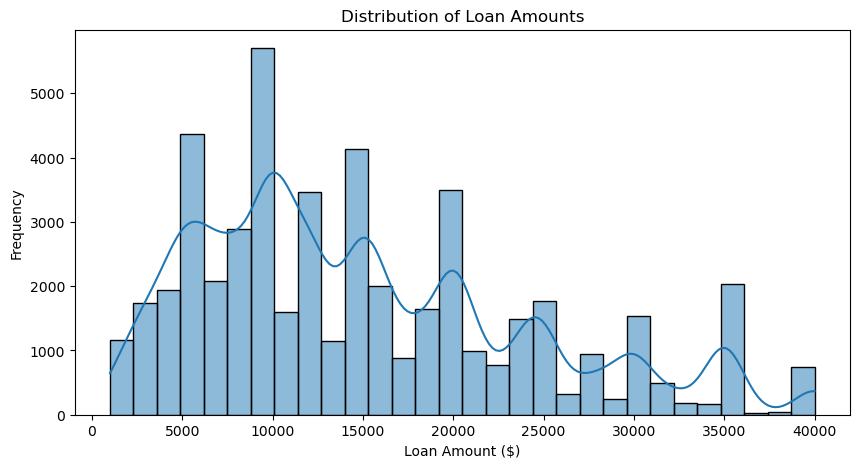

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df["loan_amnt"], bins=30, kde=True)
plt.title("Distribution of Loan Amounts")
plt.xlabel("Loan Amount ($)")
plt.ylabel("Frequency")
plt.show()


/home/spandey/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


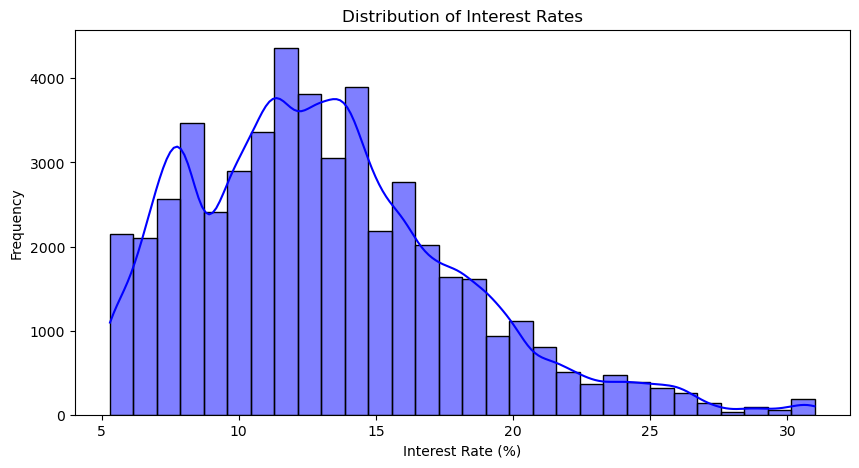

In [39]:
plt.figure(figsize=(10,5))
sns.histplot(df["int_rate"], bins=30, kde=True, color="blue")
plt.title("Distribution of Interest Rates")
plt.xlabel("Interest Rate (%)")
plt.ylabel("Frequency")
plt.show()


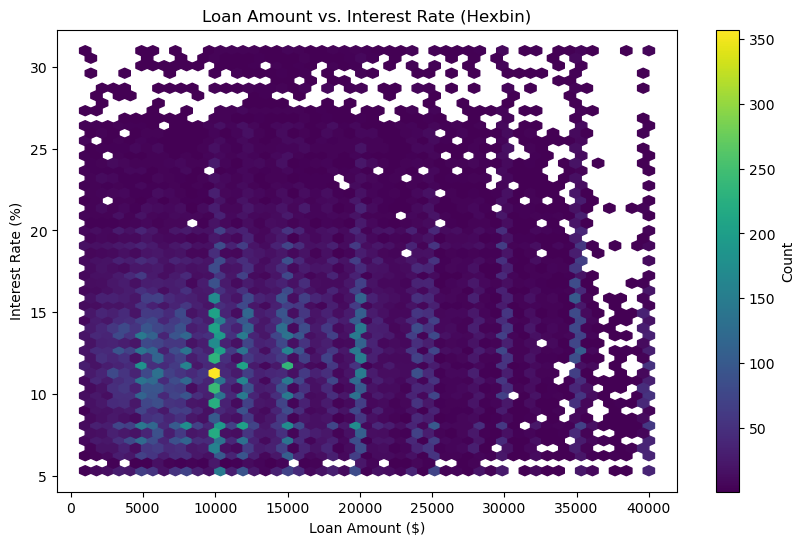

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hexbin(df["loan_amnt"], df["int_rate"], gridsize=50, cmap="viridis", mincnt=1)
plt.colorbar(label="Count")
plt.title("Loan Amount vs. Interest Rate (Hexbin)")
plt.xlabel("Loan Amount ($)")
plt.ylabel("Interest Rate (%)")
plt.show()


/home/spandey/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


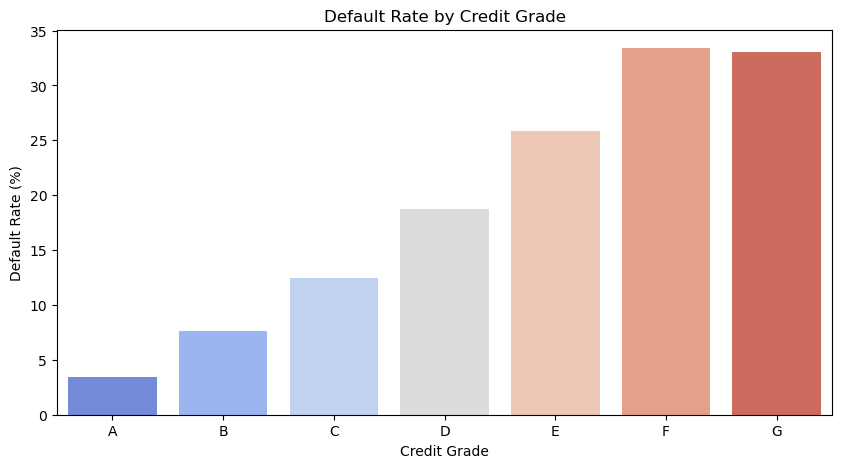

In [64]:
default_rate = df[df["loan_status"] == "Charged Off"].groupby("grade", observed=False)["loan_amnt"].count() / df.groupby("grade", observed=False)["loan_amnt"].count() * 100

plt.figure(figsize=(10,5))
sns.barplot(x=default_rate.index, y=default_rate.values, palette="coolwarm")
plt.title("Default Rate by Credit Grade")
plt.xlabel("Credit Grade")
plt.ylabel("Default Rate (%)")
plt.show()


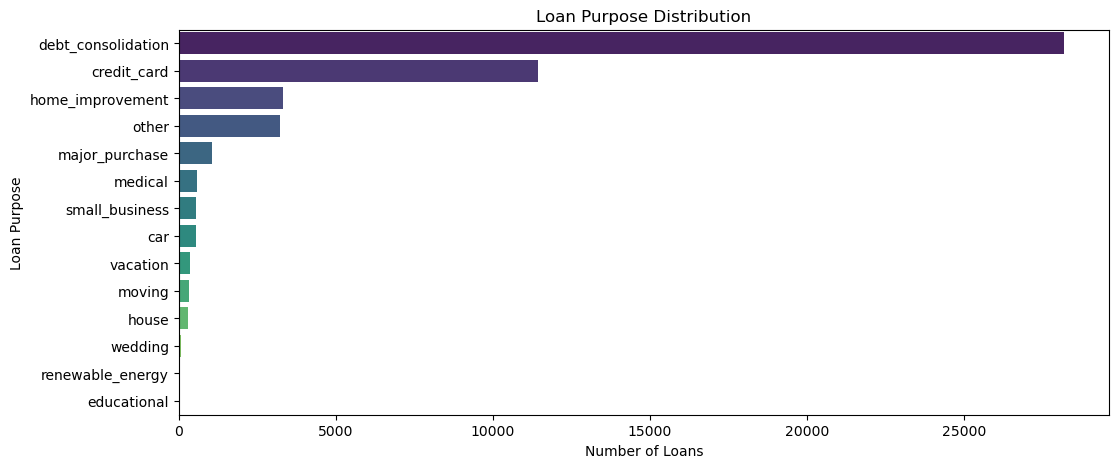

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
sns.countplot(y=df["purpose"], order=df["purpose"].value_counts().index, palette="viridis")
plt.title("Loan Purpose Distribution")
plt.xlabel("Number of Loans")
plt.ylabel("Loan Purpose")
plt.show()


/tmp/ipykernel_3364/3146691136.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_income = df[df["loan_status"] == "Charged Off"].groupby("income_bins")["loan_amnt"].count() / df.groupby("income_bins")["loan_amnt"].count() * 100
/home/spandey/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


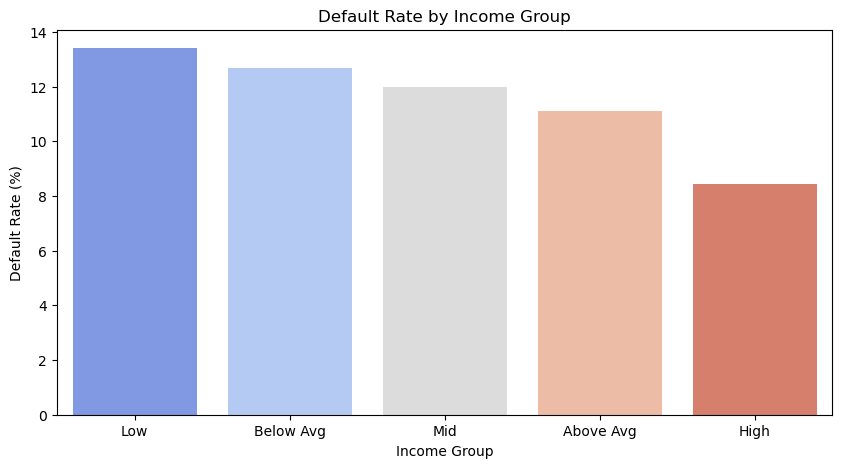

In [66]:
df["income_bins"] = pd.qcut(df["annual_inc"], q=5, labels=["Low", "Below Avg", "Mid", "Above Avg", "High"])

# Calculate default rate per income bin
default_rate_income = df[df["loan_status"] == "Charged Off"].groupby("income_bins")["loan_amnt"].count() / df.groupby("income_bins")["loan_amnt"].count() * 100


plt.figure(figsize=(10,5))
sns.barplot(x=default_rate_income.index, y=default_rate_income.values, palette="coolwarm")
plt.title("Default Rate by Income Group")
plt.xlabel("Income Group")
plt.ylabel("Default Rate (%)")
plt.show()


/tmp/ipykernel_3364/1968667586.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate_dti = df[df["loan_status"] == "Charged Off"].groupby("dti_bins")["loan_amnt"].count() / df.groupby("dti_bins")["loan_amnt"].count() * 100
/home/spandey/anaconda3/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bootstrap=bootstrap))


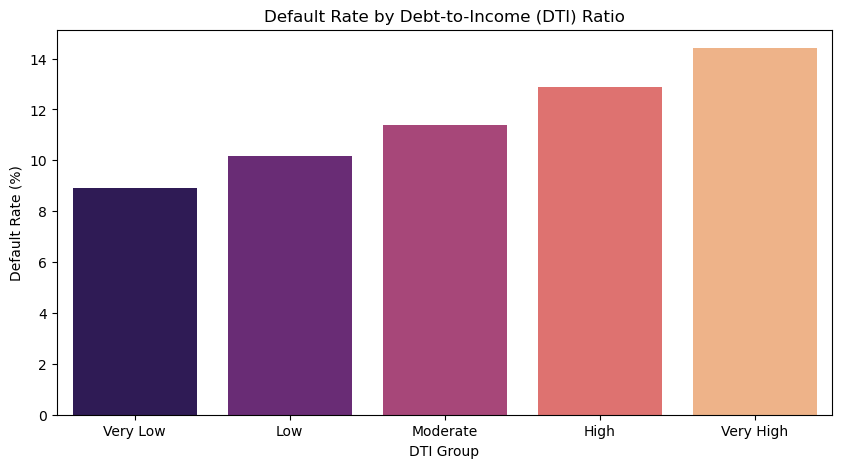

In [67]:
# Create DTI bins
df["dti_bins"] = pd.qcut(df["dti"], q=5, labels=["Very Low", "Low", "Moderate", "High", "Very High"])

# Calculate default rate per DTI bin
default_rate_dti = df[df["loan_status"] == "Charged Off"].groupby("dti_bins")["loan_amnt"].count() / df.groupby("dti_bins")["loan_amnt"].count() * 100

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=default_rate_dti.index, y=default_rate_dti.values, palette="magma")
plt.title("Default Rate by Debt-to-Income (DTI) Ratio")
plt.xlabel("DTI Group")
plt.ylabel("Default Rate (%)")
plt.show()


## Section 2: Exploratory data analysis with SQL

In [1]:
import sqlite3
import pandas as pd

# Load dataset
df = pd.read_csv("data/loan_data_50k_clean.csv")

# Connect to SQLite database (or create it if it doesn't exist)
conn = sqlite3.connect("data/loans50k.db")

# Save the DataFrame to an SQL table
df.to_sql("loans50k", conn, if_exists="replace", index=False)

# Verify that the table was created
print("Data has been saved.")


Data has been saved.


In [2]:
# Connect to your SQLite database
conn = sqlite3.connect("data/loans50k.db")

# Query A: Default Rates by Loan Grade
query_grade = """
SELECT grade, 
       COUNT(*) AS total_loans,
       SUM(CASE WHEN loan_status = 'Charged Off' THEN 1 ELSE 0 END) AS defaulted_loans,
       (SUM(CASE WHEN loan_status = 'Charged Off' THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS default_rate
FROM loans50k
GROUP BY grade
ORDER BY default_rate DESC;
"""
df_default_rates = pd.read_sql(query_grade, conn)
print("Default Rates by Grade:")
print(df_default_rates)

Default Rates by Grade:
  grade  total_loans  defaulted_loans  default_rate
0     F          913              305     33.406353
1     G          272               90     33.088235
2     E         3082              797     25.859831
3     D         7226             1353     18.724052
4     C        14434             1792     12.415131
5     B        14473             1107      7.648725
6     A         9600              334      3.479167


In [3]:
# Query B: Default Rates by Interest Rate Bucket
query_rate = """
SELECT ROUND(int_rate, 1) AS rate_bucket, 
       COUNT(*) AS total_loans, 
       SUM(CASE WHEN loan_status = 'Charged Off' THEN 1 ELSE 0 END) AS defaults,
       (SUM(CASE WHEN loan_status = 'Charged Off' THEN 1 ELSE 0 END) * 100.0 / COUNT(*)) AS default_rate
FROM loans50k
GROUP BY rate_bucket
ORDER BY rate_bucket;
"""
df_interest_impact = pd.read_sql(query_rate, conn)
print("\nDefault Rates by Interest Rate Bucket:")
print(df_interest_impact)


Default Rates by Interest Rate Bucket:
     rate_bucket  total_loans  defaults  default_rate
0            5.3         1260        22      1.746032
1            5.4           16         2     12.500000
2            5.8           15         2     13.333333
3            5.9           38         0      0.000000
4            6.0          264         6      2.272727
..           ...          ...       ...           ...
216         30.6           20         1      5.000000
217         30.7           10         3     30.000000
218         30.8           76        26     34.210526
219         30.9           33         9     27.272727
220         31.0           13         3     23.076923

[221 rows x 4 columns]


In [4]:
# Query C: Loan Performance by Loan Status
query_status = """
SELECT loan_status,
       COUNT(*) AS total_loans,
       AVG(total_pymnt) AS avg_total_payment,
       AVG(recoveries) AS avg_recoveries,
       AVG(out_prncp) AS avg_outstanding_principal
FROM loans50k
GROUP BY loan_status;
"""
df_loan_performance = pd.read_sql(query_status, conn)
print("\nLoan Performance by Loan Status:")
print(df_loan_performance)

# Close the connection when done
conn.close()


Loan Performance by Loan Status:
                                         loan_status  total_loans  \
0                                        Charged Off         5778   
1                                            Current        20279   
2                                            Default            1   
3  Does not meet the credit policy. Status:Charge...           24   
4  Does not meet the credit policy. Status:Fully ...           43   
5                                         Fully Paid        23097   
6                                    In Grace Period          203   
7                                  Late (16-30 days)           88   
8                                 Late (31-120 days)          487   

   avg_total_payment  avg_recoveries  avg_outstanding_principal  
0        8267.927780     1160.044761                   0.000000  
1        7657.283916        0.000000               10485.041664  
2       11148.010000        0.000000                9606.520000  
3        40